In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import data

In [ ]:
org_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/org_data.csv', index_col=0)
# investments, funding_rounds, investors 중 organization investors를 organization uuid로 병합
#최종적으로 쓰는 데이터: 회사명, series a/b/c, org_uuid, funding round 이름/uuid, 투자자 이름/uuid, 투자 횟수, 투자자 수, raised amount, total funding, post money valuation
org_data.head(2)

,name_x,investment_type,org_uuid,funding_round_name,funding_round_uuid,investor_name,investor_uuid,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
0,Accel investment in Series A - Meta,series_a,df662812-7f97-0b43-9d3e-12f64f504fbb,Series A - Meta,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Accel,b08efc27-da40-505a-6f9d-c9e14247bf36,1884.0,4.0,12700000.0,2.612282e+10,NaN
1,Accel investment in Series A - Meta,series_a,df662812-7f97-0b43-9d3e-12f64f504fbb,Series A - Meta,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Accel,b08efc27-da40-505a-6f9d-c9e14247bf36,1884.0,4.0,12700000.0,2.612282e+10,98000000.0


In [ ]:
personal_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/personal_data.csv', index_col=0)
# 동일한 방식으로 개인 투자자에 대해서 investor uuid를 기준으로 병합한 dataframe
personal_data.head(2)

,name_x,investment_type,investor_uuid,funding_round_name,funding_round_uuid,investor_name,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
0,Accel investment in Series A - Meta,series_a,b08efc27-da40-505a-6f9d-c9e14247bf36,Series A - Meta,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Accel,NaN,4.0,12700000.0,NaN,98000000.0
1,Greylock investment in Series B - Meta,series_b,e2006571-6b7a-e477-002a-f7014f48a7e3,Series B - Meta,6fae3958-a001-27c0-fb7e-666266aedd78,Greylock,NaN,5.0,27500000.0,NaN,502500000.0


series 별 분류 및 투자 회상에 따른 그룹화

In [ ]:
series_a=org_data[org_data['investment_type']=='series_a']
series_b=org_data[org_data['investment_type']=='series_b']
series_c=org_data[org_data['investment_type']=='series_c']
# series a/b/c에 따라서 분류

In [ ]:
a=series_a.groupby(['investor_name'])
b=series_b.groupby(['investor_name'])
c=series_c.groupby(['investor_name'])
group=org_data.groupby(['investor_name'])
# 투자자명(투자 회사)가 동일한 경우로 그룹화

In [ ]:
group_a=series_a.groupby(['investor_name']).sum()
group_b=series_b.groupby(['investor_name']).sum()
group_c=series_c.groupby(['investor_name']).sum()
group_all=group.sum()
# 그룹 내에서(같은 투자 회사 내에서) 투자 횟수, 투자자 수, 모금액, 최종 투자 금액(usd), post money valuation(usd)의 합

In [ ]:
group_a_mean=series_a.groupby(['investor_name']).mean()
group_b_mean=series_b.groupby(['investor_name']).mean()
group_c_mean=series_c.groupby(['investor_name']).mean()
# 그룹 내에서(같은 투자 회사 내에서) 투자 횟수, 투자자 수, 모금액, 최종 투자 금액(usd), post money valuation(usd)의 평균

In [ ]:
group_a.head(2)

,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
investor_name,,,,,
#Angels,3040.0,774.0,956200000.0,2.227279e+10,2.753300e+10
#adm VENTURES,1008.0,172.0,421813965.0,4.249985e+09,1.109653e+09


post money vaulation(usd) 총합/평균에 대한 내림차순 정렬

In [ ]:
a_rank=group_a.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False) #series a에서 post_money_valuation_usd 총합이 큰 순으로 정렬
b_rank=group_b.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False)
c_rank=group_c.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False)

In [ ]:
a_mean_rank=group_a_mean.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False) #series a에서 post_money_valuation_usd 평균이 큰 순으로 정렬
b_mean_rank=group_b_mean.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False)
c_mean_rank=group_c_mean.sort_values(by='post_money_valuation_usd', ascending=False, inplace=False)

In [ ]:
a_rank.head(2)

,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
investor_name,,,,,
Benchmark,525742.0,2918.0,1.201768e+10,1.511240e+12,8.569977e+11
Sequoia Capital,3128961.0,7200.0,2.125199e+10,7.504142e+11,8.405088e+11


In [ ]:
a_mean_rank.head(2)

,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
investor_name,,,,,
National Council for Social Security Fund,1.0,1.00000,NaN,2.200000e+10,8.500000e+10
SIG China (SIG Asia Investments),327.0,2.73955,1.663819e+07,4.478091e+08,4.323857e+10


총합/평균에 대한 상위 10%와 나머지로 분류

In [ ]:
#총합 상위 10%
top_a=a_rank[:(int(len(a_rank)*0.1))]
top_b=b_rank[:(int(len(b_rank)*0.1))]
top_c=c_rank[:(int(len(c_rank)*0.1))]

#총합 나머지
else_a=a_rank[(int(len(a_rank)*0.1)):]
else_b=b_rank[(int(len(b_rank)*0.1)):]
else_c=c_rank[(int(len(c_rank)*0.1)):]

In [ ]:
#평균 상위 10%
top_a_mean=a_mean_rank[:(int(len(a_mean_rank)*0.1))]
top_b_mean=b_mean_rank[:(int(len(b_mean_rank)*0.1))]
top_c_mean=c_mean_rank[:(int(len(c_mean_rank)*0.1))]

#평균 나머지
else_a_mean=a_mean_rank[(int(len(a_mean_rank)*0.1)):]
else_b_mean=b_mean_rank[(int(len(b_mean_rank)*0.1)):]
else_c_mean=c_mean_rank[(int(len(c_mean_rank)*0.1)):]

In [ ]:
print(len(a_rank), len(top_a), len(else_a), sep='\n')

35932
3593
32339


correlation & corrplot

In [ ]:
top_a.corr()

,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
investment_count,1.000000,0.733227,0.648131,0.500296,0.487839
investor_count,0.733227,1.000000,0.763487,0.592241,0.582979
raised_amount_usd,0.648131,0.763487,1.000000,0.516470,0.517204
total_funding_usd,0.500296,0.592241,0.516470,1.000000,0.885968
post_money_valuation_usd,0.487839,0.582979,0.517204,0.885968,1.000000


In [ ]:
else_a.corr()

,investment_count,investor_count,raised_amount_usd,total_funding_usd,post_money_valuation_usd
investment_count,1.000000,0.583438,0.456486,0.080020,0.117002
investor_count,0.583438,1.000000,0.555905,0.096133,0.308021
raised_amount_usd,0.456486,0.555905,1.000000,0.116363,0.159932
total_funding_usd,0.080020,0.096133,0.116363,1.000000,0.037221
post_money_valuation_usd,0.117002,0.308021,0.159932,0.037221,1.000000


<ipython-input-60-82b37350517b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(i.corr(), dtype=np.bool)


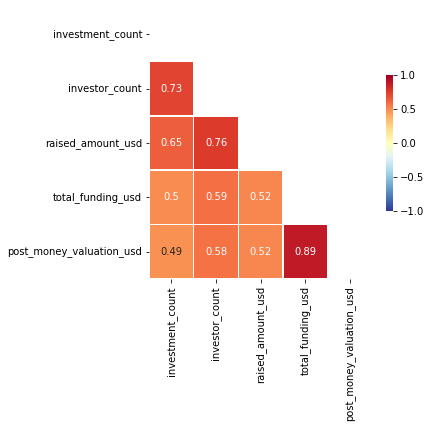

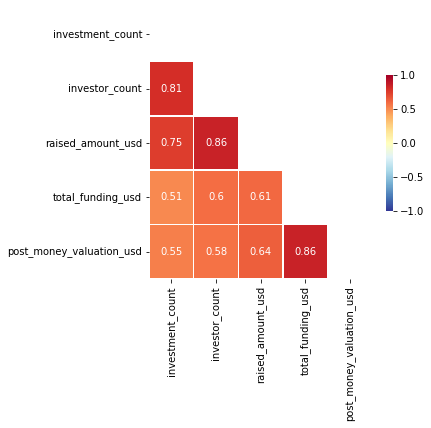

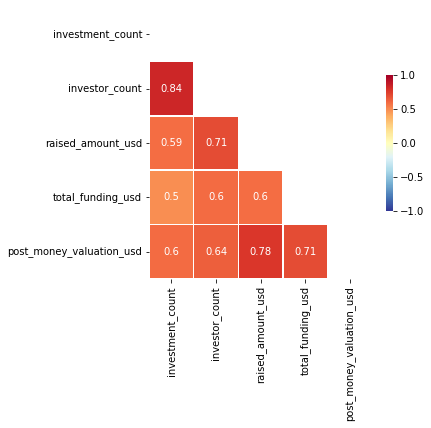

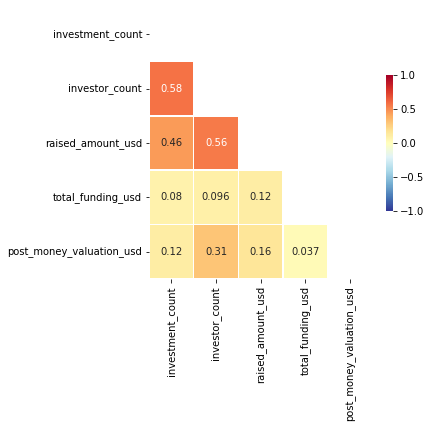

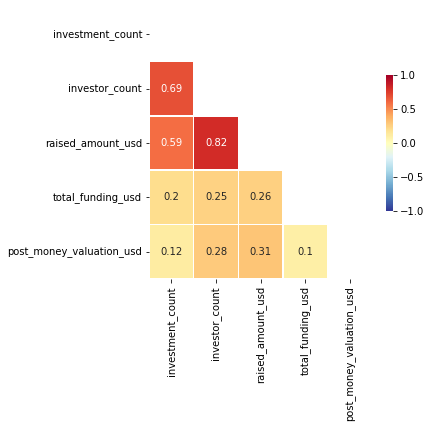

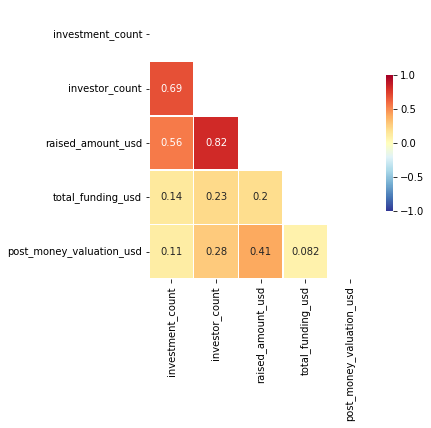

In [ ]:
lst=[top_a, top_b, top_c, else_a, else_b, else_c]
for i in lst:
  fig, ax = plt.subplots( figsize=(5,5) )
  mask = np.zeros_like(i.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(i.corr(), cmap = 'RdYlBu_r', annot = True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
  plt.show()

<ipython-input-57-688fc8b9cbe9>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(i.corr(), dtype=np.bool)


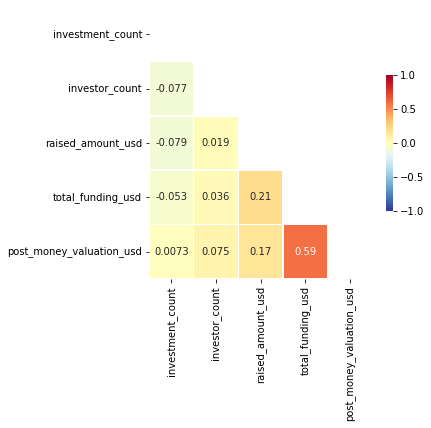

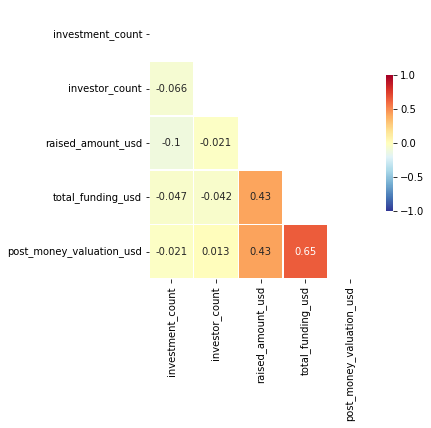

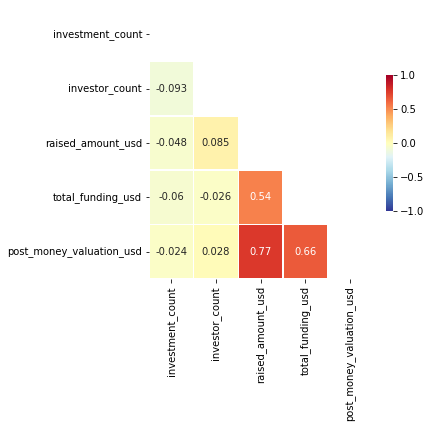

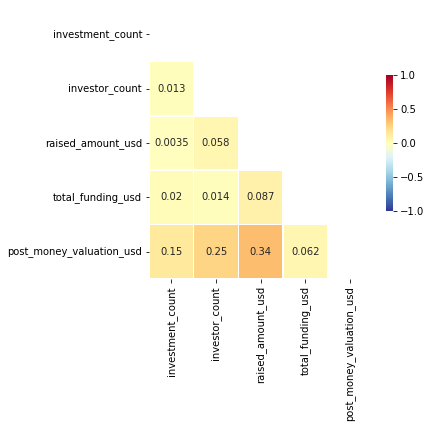

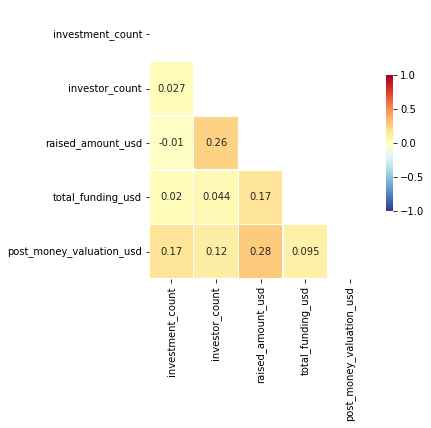

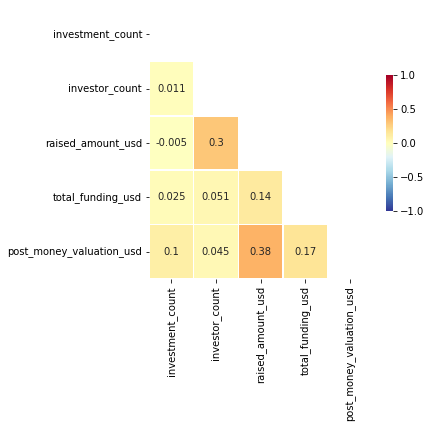

In [ ]:
lst=[top_a_mean, top_b_mean, top_c_mean, else_a_mean, else_b_mean, else_c_mean]
for i in lst:
  fig, ax = plt.subplots( figsize=(5,5) )
  mask = np.zeros_like(i.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(i.corr(), cmap = 'RdYlBu_r', annot = True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
  plt.show()

In [ ]:
#series 별로 나눈 것을 다시 병합.. corrplot을 전체에 대해서 한번 그려보려고
top_all=pd.concat([top_a, top_b, top_c], axis=0)
else_all=pd.concat([else_a, else_total_b, else_total_c], axis=0)

<ipython-input-69-9e90136ca1b8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(i.corr(), dtype=np.bool)


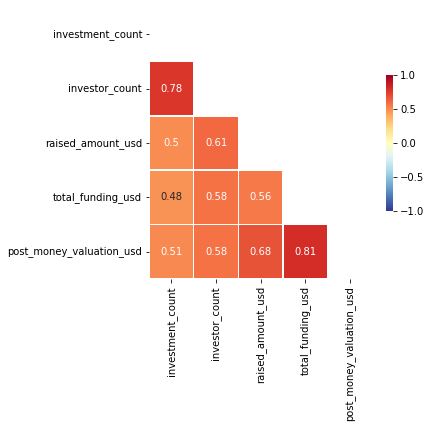

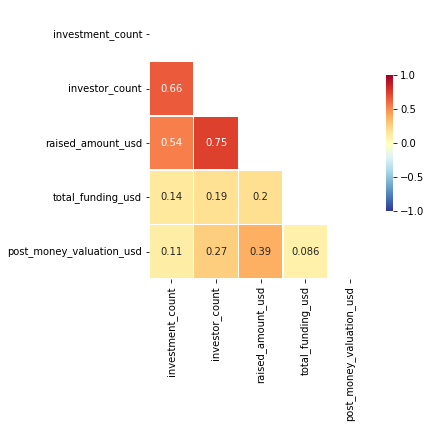

In [ ]:
lst=[top_all, else_all]
for i in lst:
  fig, ax = plt.subplots( figsize=(5,5) )

  mask = np.zeros_like(i.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(i.corr(), cmap = 'RdYlBu_r', annot = True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
  plt.show()